# Các thư viện

In [29]:
import pandas as pd
import seaborn as sns

# Đọc dữ liệu

In [2]:
weather_df = pd.read_csv('data/cleaned/daily_weather_data.csv', encoding='utf-8')
weather_df['date']= pd.to_datetime(weather_df['date'], format='%Y-%m-%d')
weather_df.head(5)

,date,country,city,Latitude,Longitude,tavg,tmin,tmax,wdir,wspd,pres,continent
0,2018-07-21,Abkhazia,Sukhumi,43.001525,41.023415,23.4,20.9,25.5,329.0,9.3,1009.6,Asia
1,2018-07-22,Abkhazia,Sukhumi,43.001525,41.023415,23.5,21.0,25.7,337.0,9.4,1010.0,Asia
2,2018-07-23,Abkhazia,Sukhumi,43.001525,41.023415,23.5,21.1,25.5,41.0,8.2,1007.7,Asia
3,2018-07-24,Abkhazia,Sukhumi,43.001525,41.023415,24.3,20.8,27.1,10.0,9.3,1004.4,Asia
4,2018-07-25,Abkhazia,Sukhumi,43.001525,41.023415,26.5,22.7,30.0,9.0,9.7,1002.0,Asia


# Câu hỏi 1: 

### Trong tháng 12/2021, liệt kê 10 thành phố có nhiệt độ trung bình thấp nhất

In [85]:
min_temp_DEC_21 = weather_df[pd.DatetimeIndex(weather_df['date']).month == 12]
min_temp_DEC_21 = min_temp_DEC_21[pd.DatetimeIndex(min_temp_DEC_21['date']).year == 2021]
min_temp_DEC_21 = min_temp_DEC_21[['city','tavg']]

In [86]:
min_temp_DEC_21

,city,tavg
1229,Sukhumi,11.3
1230,Sukhumi,8.6
1231,Sukhumi,9.0
1232,Sukhumi,11.4
1233,Sukhumi,12.3
...,...,...
316923,El Aaiún,17.9
316924,El Aaiún,19.3
316925,El Aaiún,19.6
316926,El Aaiún,22.3


In [89]:
min_temp_DEC_21 = min_temp_DEC_21.groupby('city').mean()

In [90]:
min_temp_DEC_21.sort_values('tavg').head(10)

,tavg
city,
Longyearbyen,-10.306452
Astana,-7.090323
Moscow,-6.361290
Helsinki,-5.587097
Tallinn,-4.412903
Ottawa,-3.683871
Riga,-3.654839
Vilnius,-3.258065
Pyongyang,-2.919355


# Câu hỏi 2:

## Thể hiện _nhiệt độ trung bình_ của một thành phố tại Việt Nam qua từng tháng, từng năm

### Kiểm tra Vietnam có bao nhiêu thành phố được thu thập?

In [10]:
weather_df[weather_df['country']=='Vietnam']['city'].value_counts()

Hanoi    1745
Name: city, dtype: int64

Chỉ có một thành phố là Hà Nội

### Để dễ nhìn, ta chỉ cần lấy 2 cột là __date__ và __tavg__ cho __Hanoi_df__

In [21]:
Hanoi_df = weather_df[weather_df['country']=='Vietnam'][['date', 'tavg']]
Hanoi_df

,date,tavg
312325,2018-01-01,17.3
312326,2018-01-02,17.1
312327,2018-01-03,19.3
312328,2018-01-04,19.4
312329,2018-01-05,20.1
...,...,...
314065,2022-10-07,25.8
314066,2022-10-08,26.4
314067,2022-10-09,24.8
314068,2022-10-10,23.9


### Thêm cột __month__ và __year__

In [22]:
Hanoi_df['month'] = pd.DatetimeIndex(Hanoi_df['date']).month
Hanoi_df['year'] = pd.DatetimeIndex(Hanoi_df['date']).year

In [25]:
Hanoi_df.set_index('date')

,tavg,month,year
date,,,
2018-01-01,17.3,1,2018
2018-01-02,17.1,1,2018
2018-01-03,19.3,1,2018
2018-01-04,19.4,1,2018
2018-01-05,20.1,1,2018
...,...,...,...
2022-10-07,25.8,10,2022
2022-10-08,26.4,10,2022
2022-10-09,24.8,10,2022


In [27]:
Hanoi_df.groupby(['year', 'month']).mean('tavg')

tavg
year month           
2018 1      17.358065
     2      17.007143
     3      22.025806
     4      23.696667
     5      28.529032
     6      29.480000
     7      29.100000
     8      28.225806
     9      27.993333
     10     24.951613
     11     23.033333
     12     18.841935
2019 1      17.141935
     2      21.557143
     3      21.800000
     4      26.443333
     5      27.109677
     6      30.156667
     7      30.100000
     8      28.858065
     9      28.086667
     10     25.396774
     11     22.353333
     12     18.387097
2020 1      18.754839
     2      18.931034
     3      22.187097
     4      21.553333
     5      28.535484
     6      30.783333
     7      30.525806
     8      28.406452
     9      28.210000
     10     23.954839
     11     22.860000
     12     17.551613
2021 1      15.929032
     2      20.035714
     3      21.961290
     4      24.830000
     5      28.822581
     6      30.486667
     7      29.951613
     8      29.419355
     9      27.943333
     10     23.680645
     11     21.276667
     12     17.987097
2022 1      17.574194
     2      14.503571
     3      22.038710
     4      23.743333
     5      25.690323
     6      29.820000
     7      29.354839
     8      28.729032
     9      27.943333
     10     25.900000

In [28]:
Hanoi_df = Hanoi_df.pivot_table(values='tavg', index='month',columns='year')
Hanoi_df

year,2018,2019,2020,2021,2022
month,,,,,
1,17.358065,17.141935,18.754839,15.929032,17.574194
2,17.007143,21.557143,18.931034,20.035714,14.503571
3,22.025806,21.800000,22.187097,21.961290,22.038710
4,23.696667,26.443333,21.553333,24.830000,23.743333
5,28.529032,27.109677,28.535484,28.822581,25.690323
6,29.480000,30.156667,30.783333,30.486667,29.820000
7,29.100000,30.100000,30.525806,29.951613,29.354839
8,28.225806,28.858065,28.406452,29.419355,28.729032
9,27.993333,28.086667,28.210000,27.943333,27.943333


<AxesSubplot:xlabel='Tháng', ylabel='Năm'>

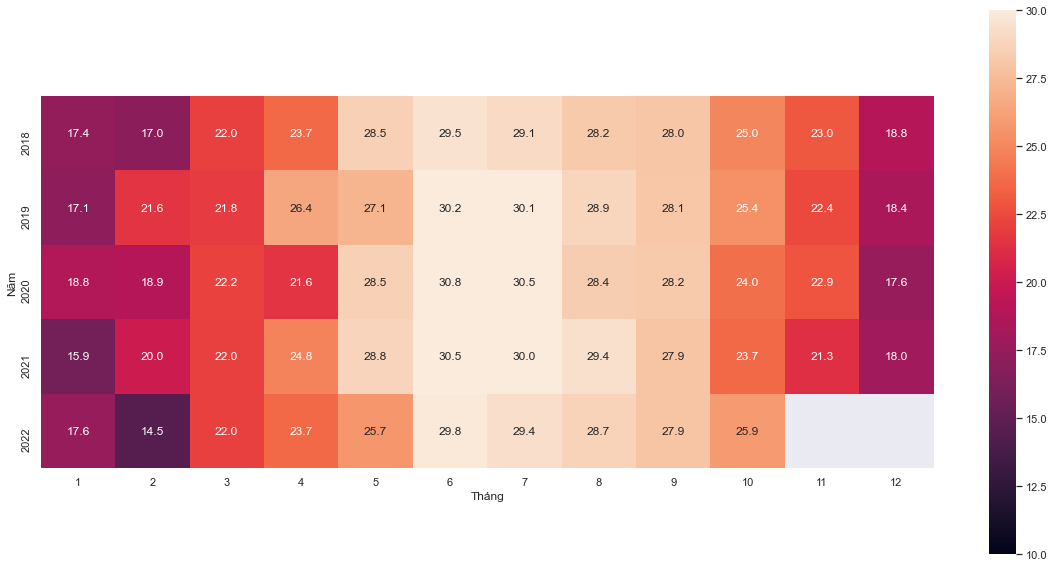

In [71]:
hn_heatmap = sns.heatmap(Hanoi_df.T, vmin=10, vmax=30, annot=True, fmt=".1f", square=True)
sns.set(rc = {'figure.figsize':(20,10)})
sns.color_palette("Reds", as_cmap=True)
hn_heatmap.set(xlabel="Tháng", ylabel="Năm")
hn_heatmap